In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import calendar

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
from urllib.request import urlretrieve


In [ ]:
#url = "https://downloads.psl.noaa.gov/Datasets/dai_pdsi/"
#filename = "pdsi.mon.mean.nc"
#file = urlretrieve(url, filename)
#ds_assignment = xr.open_dataset(file, engine= "h5netcdf")


: 

In [ ]:
ds_mask = xr.open_dataset('/home/wpratt3/Clim680/Assignment1/lsmask.nc').squeeze()

: 

In [5]:
url = 's3://noaa-nws-aorc-v1-1-1km/2023.zarr'
ds = xr.open_dataset(url, engine = 'zarr')
#ds = xr.open_dataset('sst.mnmean.nc')
#ds_month = ds.groupby('time.month').mean().where(ds_mask['mask']== 1)
#ds_month

ImportError: `fsspec` is required to use zarr's FSStore

Text(0.5, 0.92, 'Mean Sea Surface Temperature')

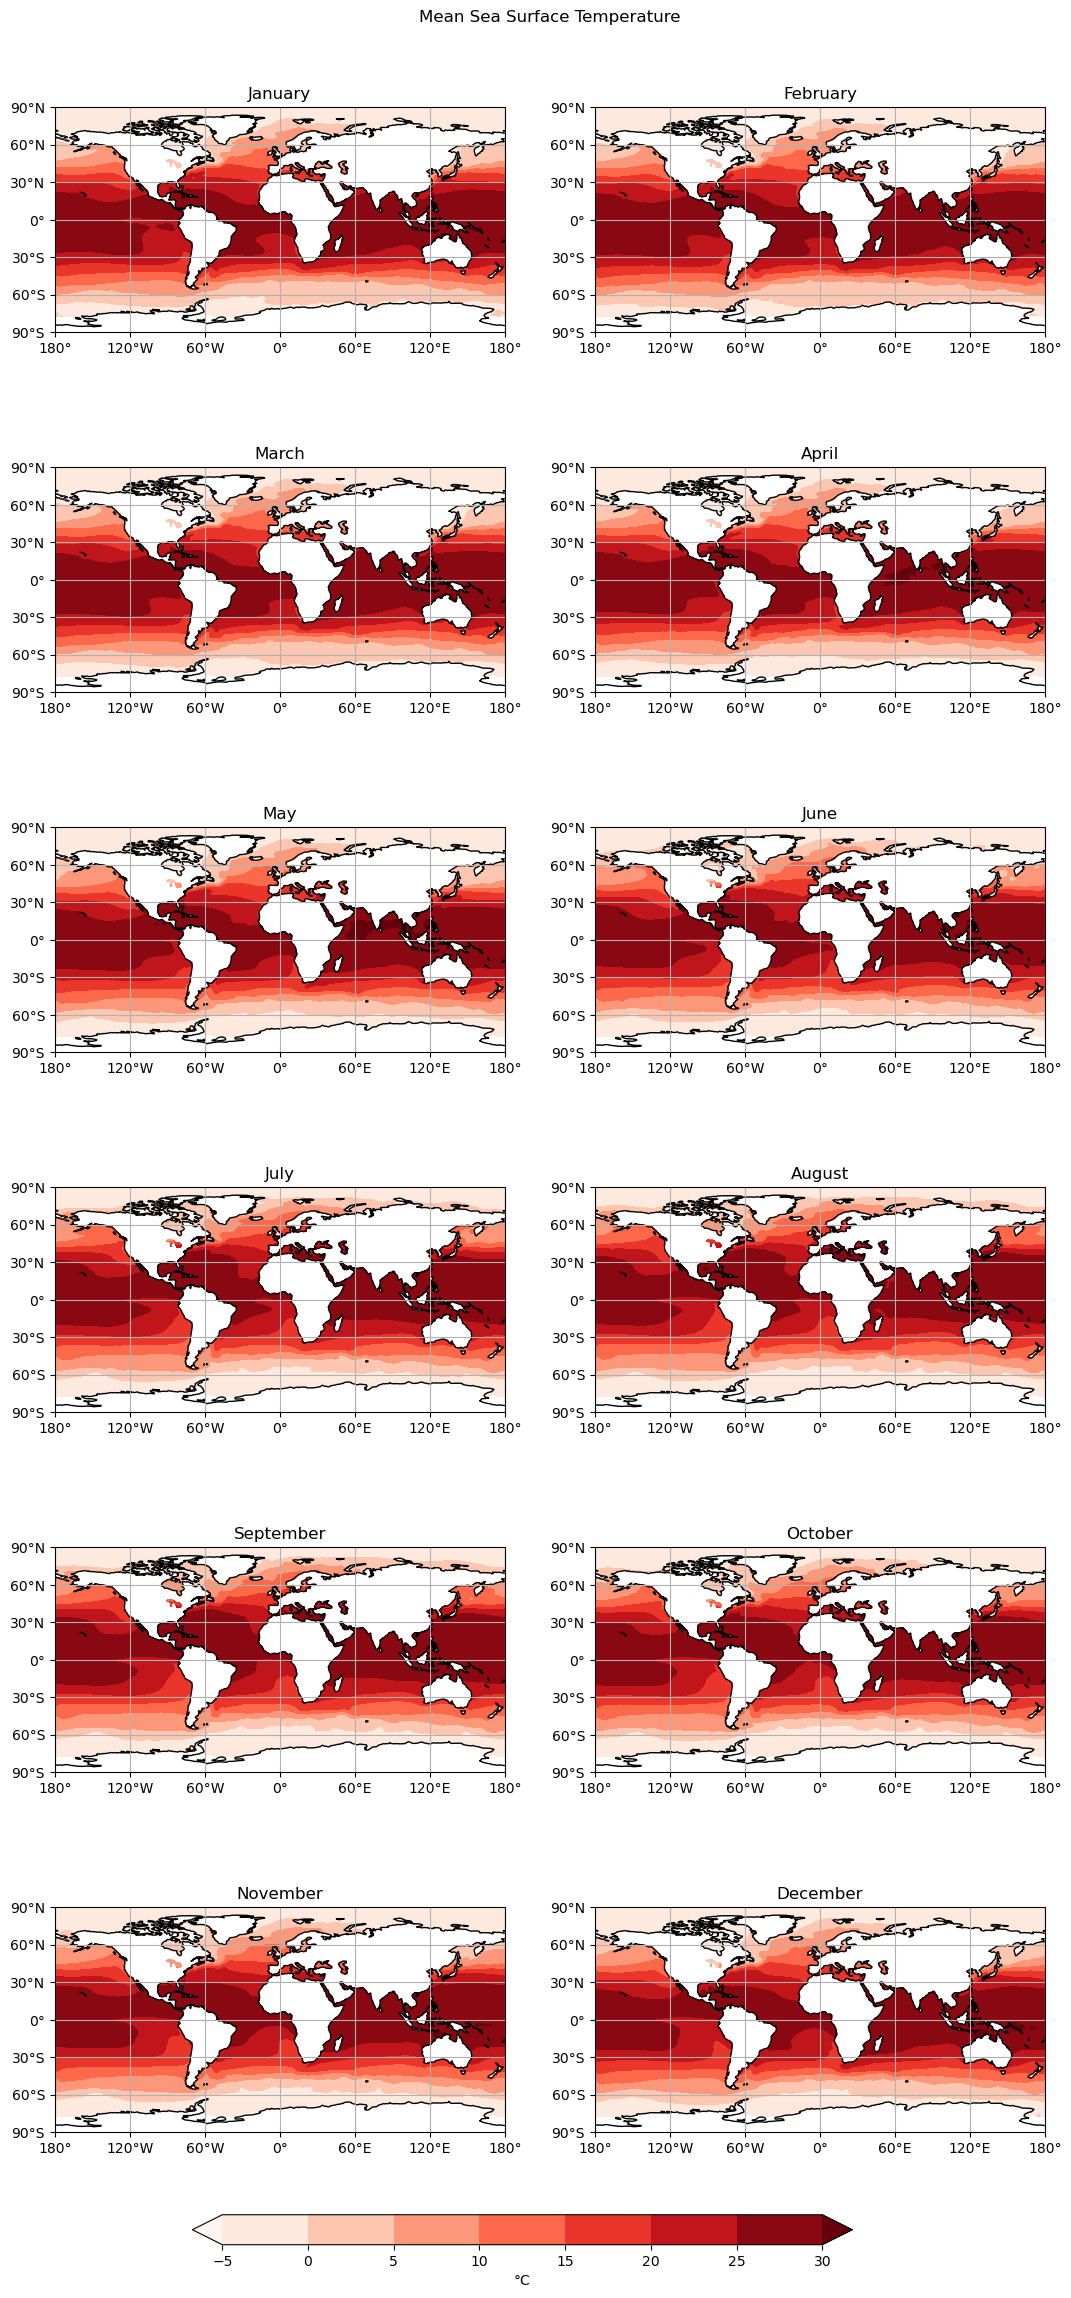

: 

In [ ]:
clevs=np.arange(-5,31,5)

fig, axs = plt.subplots(nrows=6,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,30))

axs=axs.flatten(order = 'C')

for i, month in enumerate(ds_month['month']):

        data=ds_month['sst'].sel(month=month)

        data,lons=add_cyclic_point(data,coord=ds_month['lon'])

        cs=axs[i].contourf(lons,ds_month['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='Reds',extend='both')

        axs[i].set_title(calendar.month_name[month.values])
        
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter) 

        axs[i].gridlines()

        axs[i].coastlines()

fig.subplots_adjust(bottom=0.2, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

cbar_ax = fig.add_axes([0.175, 0.175, 0.6, 0.01])

cbar=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='\u00b0C')

plt.suptitle('Mean Sea Surface Temperature', y= .92)